### Primero se importan las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Después un poco de exploración con algunos csv

In [2]:
drivers = pd.read_csv('../../Data/formula1/drivers.csv')

In [3]:
drivers.head(3)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


In [4]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     854 non-null    int64 
 1   driverRef    854 non-null    object
 2   number       854 non-null    object
 3   code         854 non-null    object
 4   forename     854 non-null    object
 5   surname      854 non-null    object
 6   dob          854 non-null    object
 7   nationality  854 non-null    object
 8   url          854 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.2+ KB


In [6]:
drivers.shape

(854, 9)

In [7]:
drivers.nationality.value_counts()

British              165
American             157
Italian               99
French                73
German                50
Brazilian             32
Argentine             24
Belgian               23
Swiss                 23
South African         23
Japanese              20
Dutch                 17
Australian            17
Austrian              15
Spanish               15
Canadian              14
Swedish               10
Finnish                9
New Zealander          9
Mexican                6
Irish                  5
Danish                 5
Monegasque             4
Russian                4
Uruguayan              4
Portuguese             4
Rhodesian              4
East German            3
Venezuelan             3
Colombian              3
Indian                 2
Thai                   2
Indonesian             1
Argentine-Italian      1
Czech                  1
American-Italian       1
Liechtensteiner        1
Chilean                1
Malaysian              1
Hungarian              1


Aquí lo que quería era averiguar cuántos mexicanos habían corrido en la Fórmula 1

In [8]:
drivers[drivers.nationality == 'Mexican']

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
211,212,rebaque,\N,\N,Hector,Rebaque,1956-02-05,Mexican,http://en.wikipedia.org/wiki/Hector_Rebaque
344,345,rodriguez,\N,\N,Pedro,Rodríguez,1940-01-18,Mexican,http://en.wikipedia.org/wiki/Pedro_Rodr%C3%ADg...
381,382,solana,\N,\N,Moisés,Solana,1935-12-26,Mexican,http://en.wikipedia.org/wiki/Mois%C3%A9s_Solana
454,454,ricardo_rodriguez,\N,\N,Ricardo,Rodríguez,1942-02-14,Mexican,http://en.wikipedia.org/wiki/Ricardo_Rodr%C3%A...
814,815,perez,11,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez
820,821,gutierrez,21,GUT,Esteban,Gutiérrez,1991-08-05,Mexican,http://en.wikipedia.org/wiki/Esteban_Guti%C3%A...


In [39]:
nationalities_count = drivers.groupby(['nationality'], as_index = False, sort = True)['driverId'].count()

nationalities_count

,nationality,driverId
0,American,157
1,American-Italian,1
2,Argentine,24
3,Argentine-Italian,1
4,Australian,17
5,Austrian,15
6,Belgian,23
7,Brazilian,32
8,British,165
9,Canadian,14


### Primer intento de graficar usando matplotlib

<Figure size 1080x540 with 0 Axes>

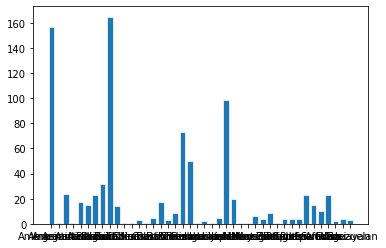

In [50]:

plt.figure(figsize = (15, 7.5))
plt.style.use('fast')


fig, ax = plt.subplots()



ax.bar(x = nationalities_count['nationality'], height = nationalities_count['driverId'], edgecolor="white", linewidth=0.7)


plt.show()

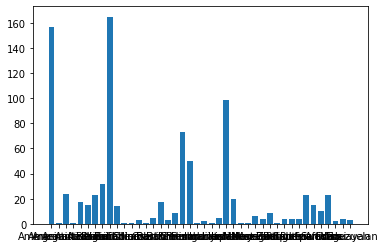

In [44]:

plt.bar(x = nationalities_count['nationality'], height = nationalities_count['driverId']);

### Decidí usar Tableau para la visualización y Python para la exploración de las siguientes bases

In [9]:
results = pd.read_csv('../../Data/formula1/results.csv')

In [10]:
results.head(3)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1


In [22]:
results[results.raceId == 1076]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
25440,25446,1076,844,6,16,1,1,1,1,26.0,58,1:27:46.548,5266548,58,1,1:20.260,236.740,1
25441,25447,1076,815,9,11,3,2,2,2,18.0,58,+20.524,5287072,58,3,1:21.094,234.305,1
25442,25448,1076,847,131,63,6,3,3,3,15.0,58,+25.593,5292141,53,4,1:21.495,233.152,1
25443,25449,1076,1,131,44,5,4,4,4,12.0,58,+28.543,5295091,51,7,1:21.886,232.039,1
25444,25450,1076,846,1,4,4,5,5,5,10.0,58,+53.303,5319851,55,8,1:22.248,231.018,1
25445,25451,1076,817,1,3,7,6,6,6,8.0,58,+53.737,5320285,54,9,1:22.451,230.449,1
25446,25452,1076,839,214,31,8,7,7,7,6.0,58,+1:01.683,5328231,58,10,1:22.469,230.399,1
25447,25453,1076,822,51,77,12,8,8,8,4.0,58,+1:08.439,5334987,54,5,1:21.651,232.707,1
25448,25454,1076,842,213,10,11,9,9,9,2.0,58,+1:16.221,5342769,52,13,1:22.731,229.669,1
25449,25455,1076,848,3,23,20,10,10,10,1.0,58,+1:19.382,5345930,54,12,1:22.589,230.064,1


In [11]:
races = pd.read_csv('../../Data/formula1/races.csv')

In [12]:
races.head(3)

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...


In [53]:
races[races.year == 2020]

,raceId,year,round,circuitId,name,date,time,url
1018,1031,2020,1,70,Austrian Grand Prix,05/07/20,13:10:00,http://en.wikipedia.org/wiki/2020_Austrian_Gra...
1019,1032,2020,2,70,Styrian Grand Prix,12/07/20,13:10:00,http://en.wikipedia.org/wiki/2020_Styrian_Gran...
1020,1033,2020,3,11,Hungarian Grand Prix,19/07/20,13:10:00,http://en.wikipedia.org/wiki/2020_Hungarian_Gr...
1021,1034,2020,4,9,British Grand Prix,02/08/20,13:10:00,http://en.wikipedia.org/wiki/2020_British_Gran...
1022,1035,2020,5,9,70th Anniversary Grand Prix,09/08/20,13:10:00,http://en.wikipedia.org/wiki/70th_Anniversary_...
1023,1036,2020,6,4,Spanish Grand Prix,16/08/20,13:10:00,http://en.wikipedia.org/wiki/2020_Spanish_Gran...
1024,1037,2020,7,13,Belgian Grand Prix,30/08/20,13:10:00,http://en.wikipedia.org/wiki/2020_Belgian_Gran...
1025,1038,2020,8,14,Italian Grand Prix,06/09/20,13:10:00,http://en.wikipedia.org/wiki/2020_Italian_Gran...
1026,1039,2020,9,76,Tuscan Grand Prix,13/09/20,13:10:00,http://en.wikipedia.org/wiki/2020_Tuscan_Grand...
1027,1040,2020,10,71,Russian Grand Prix,27/09/20,11:10:00,http://en.wikipedia.org/wiki/2020_Russian_Gran...


In [58]:
results[(results.points == 18) & (results.raceId < 1046) & (results.raceId > 1030)]

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24621,24627,1031,844,6,16,7,2,2,2,18.0,71,+2.700,5458439,64,4,1:07.901,228.933,1
24641,24647,1032,822,131,77,4,2,2,2,18.0,71,+13.719,4984402,62,7,1:07.534,230.177,1
24661,24667,1033,830,9,33,7,2,2,2,18.0,70,+8.702,5781175,60,4,1:19.184,199.176,1
24721,24727,1036,830,9,33,3,2,2,2,18.0,66,+24.177,5529456,53,4,1:21.477,205.677,1
24741,24747,1037,822,131,77,2,2,2,2,18.0,44,+8.448,5057209,27,5,1:47.983,233.503,1
24761,24767,1038,832,1,55,3,2,2,2,18.0,53,+0.415,6426471,40,2,1:23.882,248.620,1
24781,24787,1039,822,131,77,2,2,2,2,18.0,59,+4.880,8379940,53,2,1:19.432,237.712,1
24801,24807,1040,830,9,33,2,2,2,2,18.0,53,+7.729,5648093,53,3,1:37.332,216.298,1
24841,24847,1042,822,131,77,2,2,2,2,18.0,66,+25.592,5422420,66,2,1:19.345,211.113,1
24861,24867,1043,822,131,77,1,2,2,2,18.0,63,+5.783,5318213,63,2,1:15.902,232.831,1


In [76]:
quali = pd.read_csv('../../Data/formula1/qualifying.csv')

In [77]:
quali.head(2)

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869


In [78]:
quali[(quali.raceId < 1046) & (quali.raceId > 1030) & (quali.driverId == 1)]

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
8355,8379,1031,1,131,44,2,1:04.198,1:03.096,1:02.951
8374,8398,1032,1,131,44,1,1:18.188,1:17.825,1:19.273
8413,8437,1033,1,131,44,1,1:14.907,1:14.261,1:13.447
8414,8438,1034,1,131,44,1,1:25.900,1:25.347,1:24.303
8435,8459,1035,1,131,44,2,1:26.818,1:26.266,1:25.217
8454,8478,1036,1,131,44,1,1:16.872,1:16.013,1:15.584
8474,8498,1037,1,131,44,1,1:42.323,1:42.014,1:41.252
8494,8518,1038,1,131,44,1,1:19.514,1:19.092,1:18.887
8514,8538,1039,1,131,44,1,1:15.778,1:15.309,1:15.144
8534,8558,1040,1,131,44,1,1:32.983,1:32.835,1:31.304


### Calculando la correlación entre posición de quali y de carrera

In [79]:
quali_corr = quali[(quali.raceId < 1046) & (quali.raceId > 1030)][['raceId','driverId', 'position']]

In [80]:
results_corr = results[(results.raceId < 1046) & (results.raceId > 1030)][['raceId','driverId', 'position']]

In [84]:
quali_corr.rename(columns = {'raceId':'race_Id_quali', 'driverId':'driverId_quali', 'position':'position_quali'}, inplace = True)

In [85]:
quali_corr.head(2)

,race_Id_quali,driverId_quali,position_quali
8354,1031,822,1
8355,1031,1,2


In [86]:
corr_merged = pd.merge(results_corr, quali_corr, how='left', left_on = ['raceId','driverId'], right_on = ['race_Id_quali','driverId_quali'])

#df_cd = pd.merge(df_SN7577i_c, df_SN7577i_d, how='left', left_on = 'Id', right_on = 'Id')

corr_merged

,raceId,driverId,position,race_Id_quali,driverId_quali,position_quali
0,1031,822,1,1031,822,1
1,1031,844,2,1031,844,7
2,1031,846,3,1031,846,4
3,1031,1,4,1031,1,2
4,1031,832,5,1031,832,8
...,...,...,...,...,...,...
295,1045,841,16,1045,841,16
296,1045,825,17,1045,825,18
297,1045,815,18,1045,815,5
298,1045,840,\N,1045,840,13


In [87]:
corr_merged.drop(columns=['race_Id_quali', 'driverId_quali'], inplace = True)

In [88]:
corr_merged.head(3)

,raceId,driverId,position,position_quali
0,1031,822,1,1
1,1031,844,2,7
2,1031,846,3,4


<AxesSubplot:xlabel='position_quali', ylabel='position'>

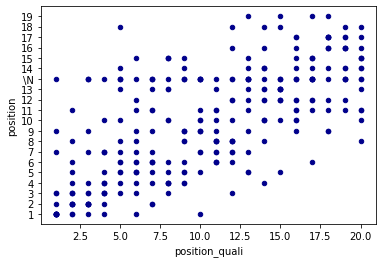

In [90]:
corr_merged.plot.scatter(x='position_quali', y='position', c='DarkBlue')

In [91]:
corr_merged.corr()

,raceId,driverId,position_quali
raceId,1.000000e+00,-0.000105,-3.441504e-15
driverId,-1.046193e-04,1.000000,-8.300648e-02
position_quali,-3.441504e-15,-0.083006,1.000000e+00


In [92]:
corr_merged.head(2)

,raceId,driverId,position,position_quali
0,1031,822,1,1
1,1031,844,2,7


In [93]:
corr_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   raceId          300 non-null    int64 
 1   driverId        300 non-null    int64 
 2   position        300 non-null    object
 3   position_quali  300 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.7+ KB


Haciendo algo de limpieza

In [95]:
corr_merged['position'].value_counts()

\N    49
1     15
8     15
12    15
2     15
10    15
9     15
11    15
7     15
6     15
5     15
4     15
3     15
13    14
14    13
15    13
16    11
17    10
18     6
19     4
Name: position, dtype: int64

In [101]:
corr_merged = corr_merged.replace(['\\N'], 0, regex = False)

corr_merged['position'].value_counts()

0     49
1     15
8     15
12    15
2     15
10    15
9     15
11    15
7     15
6     15
5     15
4     15
3     15
13    14
14    13
15    13
16    11
17    10
18     6
19     4
Name: position, dtype: int64

In [104]:
corr_merged['position'] = corr_merged['position'].astype('int64')

In [105]:
corr_merged.corr()

,raceId,driverId,position,position_quali
raceId,1.000000e+00,-0.000105,0.004756,-3.441504e-15
driverId,-1.046193e-04,1.000000,-0.073020,-8.300648e-02
position,4.755536e-03,-0.073020,1.000000,4.919726e-01
position_quali,-3.441504e-15,-0.083006,0.491973,1.000000e+00


<AxesSubplot:xlabel='position_quali', ylabel='position'>

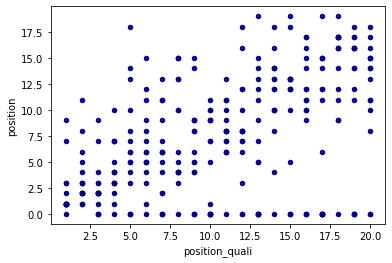

In [106]:
corr_merged.plot.scatter(x='position_quali', y='position', c='DarkBlue')

In [110]:
corr_merged.to_csv('positions_merged.csv')

### Creando la tabla dinámica para poder gráficar la gráfica dinámica

In [113]:
lap_times = pd.read_csv('../../Data/formula1/lap_times.csv')


In [116]:
sakhir = lap_times[lap_times['raceId'] == 1046]
sakhir

,raceId,driverId,lap,position,time,milliseconds
488330,1046,847,1,1,1:08.922,68922
488331,1046,847,2,1,1:38.421,98421
488332,1046,847,3,1,1:29.830,89830
488333,1046,847,4,1,1:32.256,92256
488334,1046,847,5,1,1:30.133,90133
...,...,...,...,...,...,...
489856,1046,815,83,1,0:57.066,57066
489857,1046,815,84,1,0:57.374,57374
489858,1046,815,85,1,0:57.208,57208
489859,1046,815,86,1,0:57.404,57404


In [117]:
sakhir.to_csv('sakhir.csv')

In [125]:
sakhir_pivot = sakhir.pivot_table(values = 'position', index = 'driverId', columns = 'lap', aggfunc='min')
sakhir_pivot

lap,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
driverId,,,,,,,,,,,,,,,,,,,,,
8,17.0,17.0,17.0,17.0,17.0,17.0,18.0,17.0,17.0,16.0,...,14.0,13.0,13.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
20,9.0,9.0,9.0,9.0,9.0,9.0,9.0,11.0,10.0,10.0,...,12.0,11.0,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0
815,18.0,18.0,18.0,18.0,18.0,18.0,16.0,14.0,13.0,12.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
817,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
822,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,9.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
825,11.0,11.0,11.0,11.0,12.0,12.0,12.0,12.0,12.0,13.0,...,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0
826,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,8.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
832,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
839,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,...,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False, sort=True)[source]

In [126]:
sakhir_pivot.to_csv('sakhir_pivot.csv')